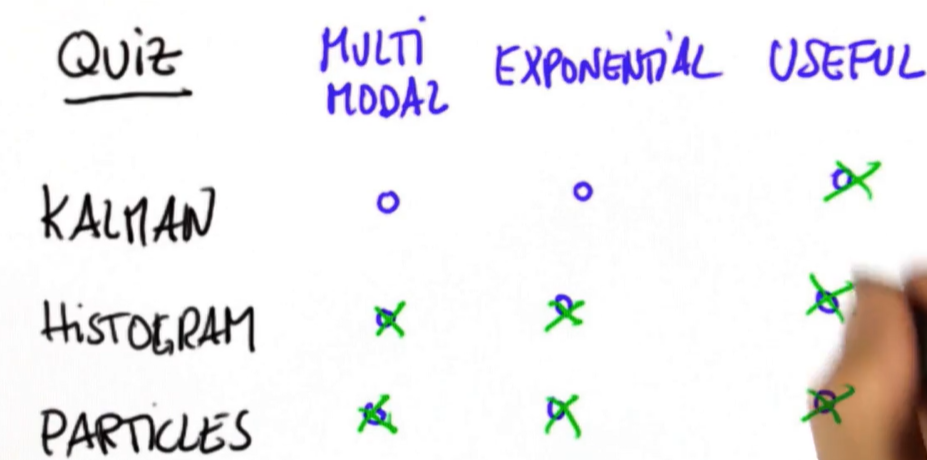

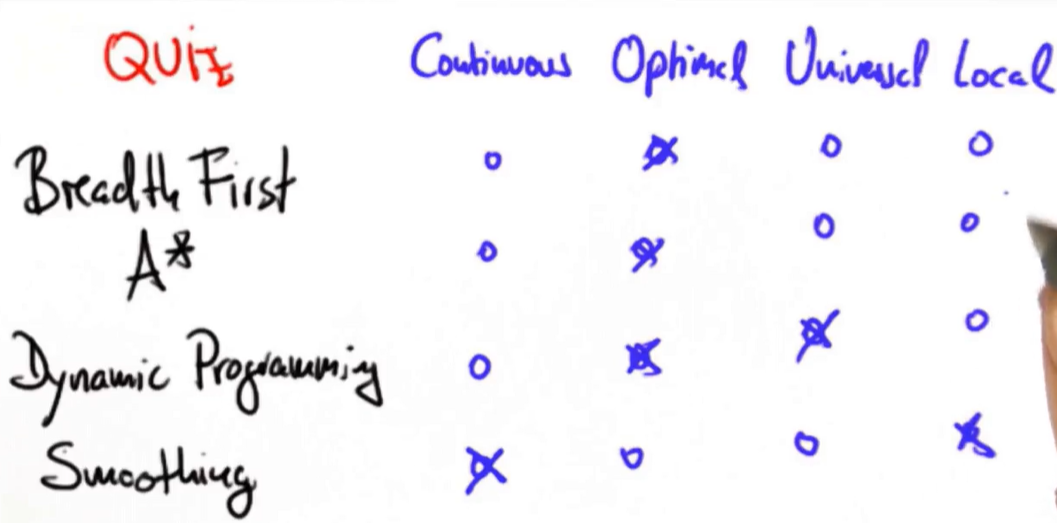

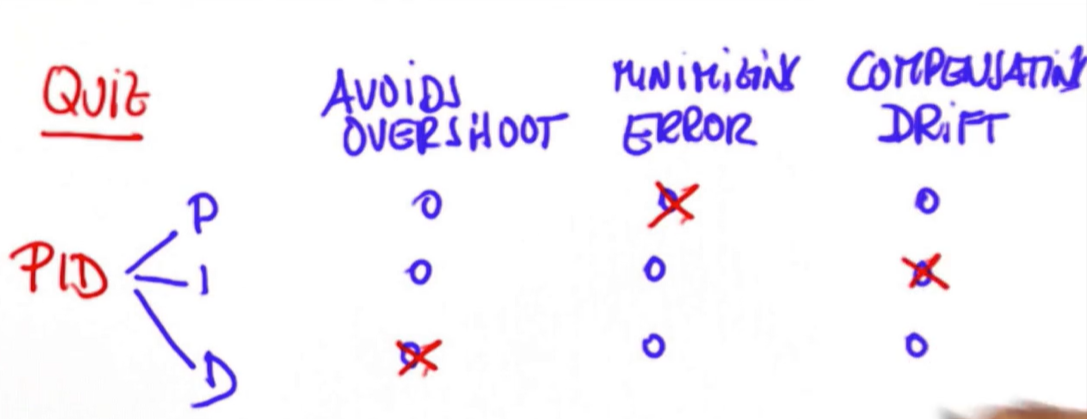

### SLAM


1. Simultaneous Localization And Mapping
    1. Graph SLAM

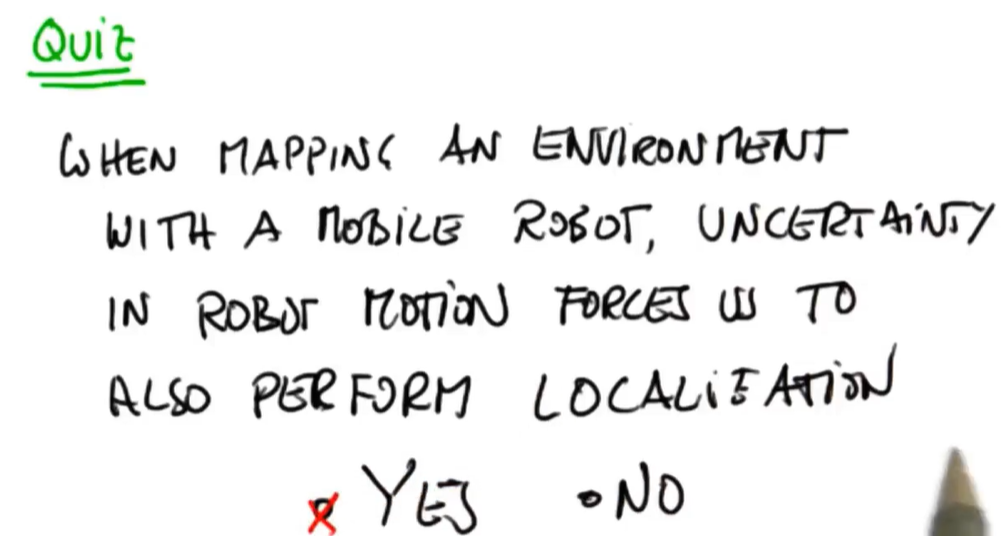
In nearly all cases of mapping, we have robot uncertainty in motion. If not address, the uncertainty will grow.


### Graph SLAM
1. Every motion ties together two locations
1. Every measurement ties together one location with a landmark
1. Iniital position $x_0, y_0$
1. Move 10 to the right $x_1, y_1$
    1. $P(x) = N(x_1-x_0-10, \sigma)$
    1. $P(y) = N(y_1-y_0, \sigma)$
    1. constraint: P(x) * P(y)
1. Graph SLAM
    1. Define our probabilities using a sequence of constraints
    1. Initial location constraint: (0, 0, 0)
    1. Relative motion constraints: lots of relative constraints that relate each robot pose to the previouis robot pose
    1. Relative measurement constraints: 
        1. been seen from the robot with some relative measurement $Z_0, Z_1$
        1. One such constraint is every time the robot sees a landmark
    1. Collects those constraints
1. Quiz
    1. 1 initial location constraint
    1. 5 motions
    1. 8 landmark constraints
    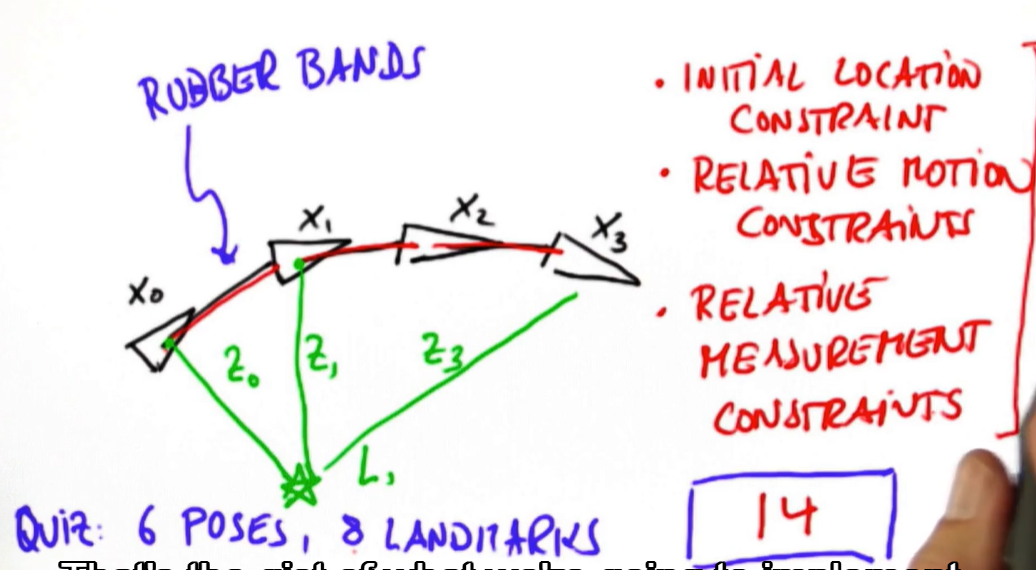

1. Have a matrix $\Omega$ and a vector $\xi$
1. Label the matrix with all the poses and all the landmarks
    1. Assume the landmarks are distinguishable
1. Every time we make an observation
1. Entry the matrix
    1. $x_1 = x_0 + 5$
        1. $ x_0 - x_1 = -5$
            1. (0, 0) = 1
            1. (0, 1) = -1
            1. $vector[0] = x_0 - x_1 = (0, 0)*x_0 + (0, 1)*x_1$ = -5
            1. Added into the matrix that starts with 0 everywhere
            1. it's a constraint that relates $x_0, x_1$ by -5
        1. $ x_1 - x_0 = 5$
            1. (1, 0) = -1
            1. (1, 1) = 1
            1. $vector[1] = x_1 - x_2 = (1, 0)*x_0 + (1, 1)*x_1$ = -5
        1. the motion contraint that relates $x_0$ to $x_1$ by the motion of 5 has modified incrementially by adding values the matrix for L elements that fall between $x_0$ and $x_1$.
        1. write the constraints twice in both cases to make sure 
            1. the diagonal element was positive
            1. the correspondant off-diagonal element as a negative value
        1. add the corresponding value on the right side (vector)
        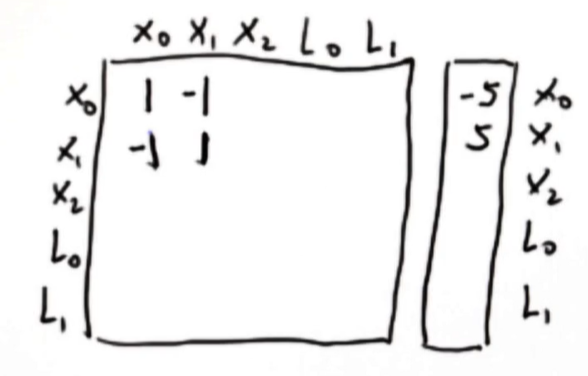
    1. $x_2 = x_1 - 4$
        1. the only affect values that occur in the region between $x_1$ and $x_2$ 
        1. they are additive
        1. add
            1. (1, 1) = 1
            1. (1, 2) = -1
            1. (2, 1) = -1
            1. (2, 2) = 1
        1. add the vector
        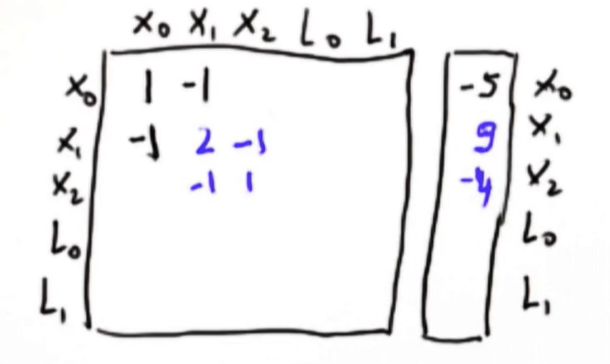
    1. at $x_1$ we see landmark $l_0$ at a distance of 9
        1. $x_1 - l_0 = -9$
        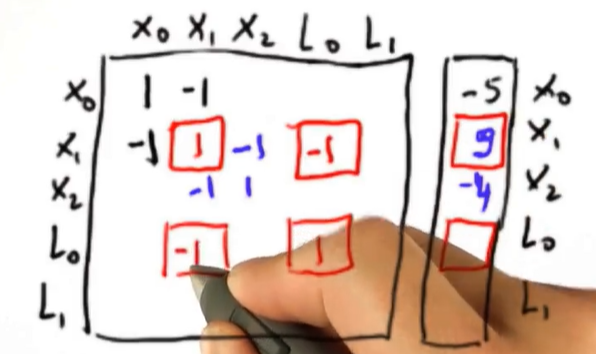

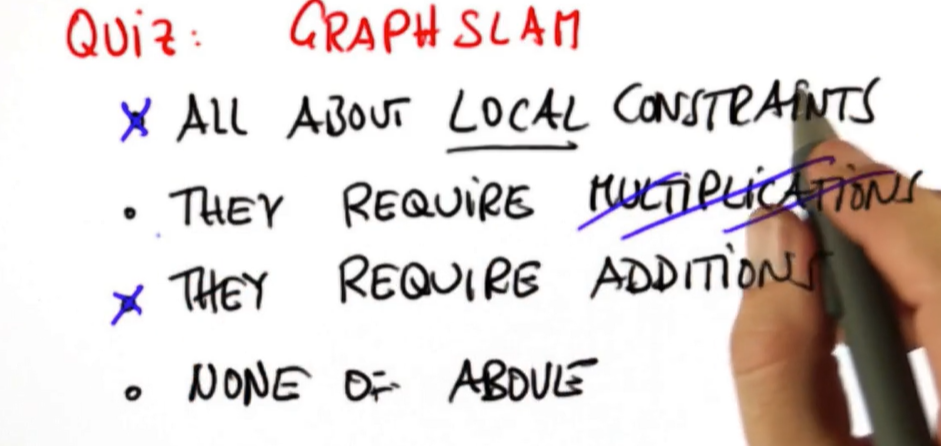

#### Initial location
1. $x_0 = 0$
1. 1 at (0,0)
1. 0 at vector (0)
1. Constraints: $x_0$ is 0


If there is 0, it means there is no direct constraint between the x, and y 
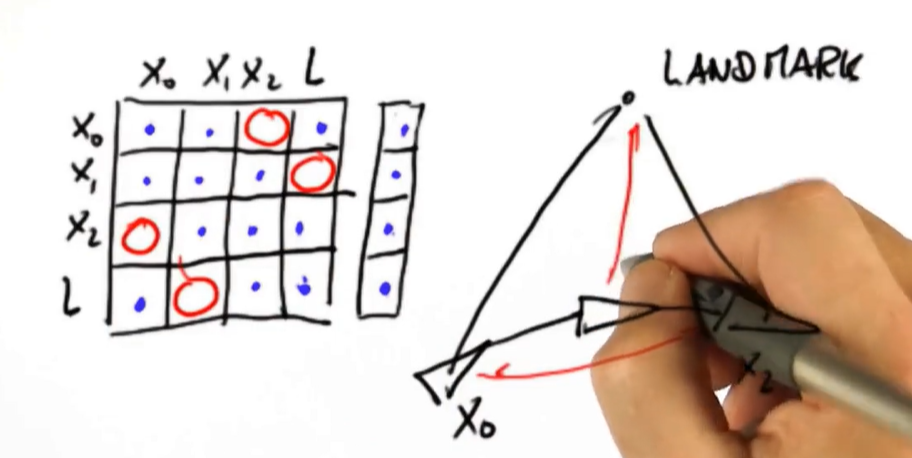

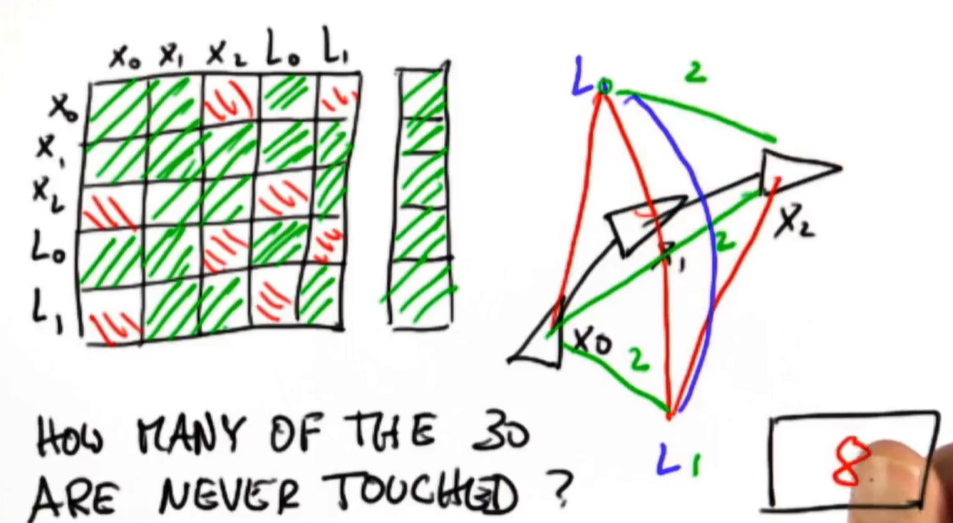

1. find the best solution for all the landmark positions/world positions by
    1. $\mu = \Omega^1\xi$ the best estimates for all the robot locations and the landmark locations
    1. keep adding numbers to these matrics every time you see a constraint

In [21]:
import numpy as np

def get_omega(size, p1, p2, sigma2 = 1):
    omega = np.zeros((size,size))    
    omega[p1,p1] = 1/sigma2
    omega[p2,p2] = 1/sigma2
    omega[p1,p2] = -1/sigma2
    omega[p2,p1] = -1/sigma2
    return omega

def get_xi(size, p1, p2, value, sigma2 = 1):
    xi = np.zeros((size,1))    
    xi[p1,0] = -value/sigma2
    xi[p2,0] = value/sigma2
    return xi

def doit(initial_pos, move1, move2):
    omega = np.zeros((3,3))
    xi = np.zeros((3,1))
    omega[0,0] = 1
    xi[0,0] = initial_pos
    omega+= get_omega(3, 0, 1)
    xi+= get_xi(3, 0, 1, move1)
     
    omega+= get_omega(3, 1, 2)
    xi+= get_xi(3, 1, 2, move2)
    
    mu = np.linalg.inv(omega).dot(xi)
    return omega, xi, mu
doit(-3, 5, 3)

(array([[ 2., -1.,  0.],
        [-1.,  2., -1.],
        [ 0., -1.,  1.]]),
 array([[-8.],
        [ 2.],
        [ 3.]]),
 array([[-3.],
        [ 2.],
        [ 5.]]))

landmark?
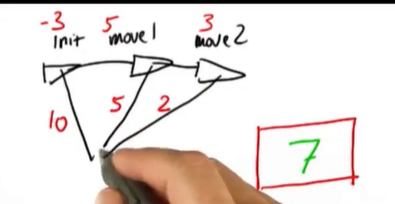

### Expension

In [17]:
def doit(initial_pos, move1, move2, z0, z1, z2):
    omega = np.zeros((3,3))
    xi = np.zeros((3,1))
    omega[0,0] = 1
    xi[0,0] = initial_pos
    
    
    omega+= get_omega(3, 0, 1)
    xi+= get_xi(3, 0, 1, move1)
     
    omega+= get_omega(3, 1, 2)
    xi+= get_xi(3, 1, 2, move2)
    
    
    omega = np.pad(omega, ((0, 1), (0,1)), mode='constant', constant_values=0)
    xi = np.pad(xi, ((0, 1), (0,0)), mode='constant', constant_values=0)
    omega+= get_omega(4, 0, 3)
    xi+= get_xi(4, 0, 3, z0)
    
    omega+= get_omega(4, 1, 3)
    xi+= get_xi(4, 1, 3, z1)
    
    omega+= get_omega(4, 2, 3)
    xi+= get_xi(4, 2, 3, z2)
    mu = np.linalg.inv(omega).dot(xi)
    return omega, xi, mu
doit(-3, 5, 3, 10, 5, 2)

(array([[ 3., -1.,  0., -1.],
        [-1.,  3., -1., -1.],
        [ 0., -1.,  2., -1.],
        [-1., -1., -1.,  3.]]),
 array([[-18.],
        [ -3.],
        [  1.],
        [ 17.]]),
 array([[-3.],
        [ 2.],
        [ 5.],
        [ 7.]]))

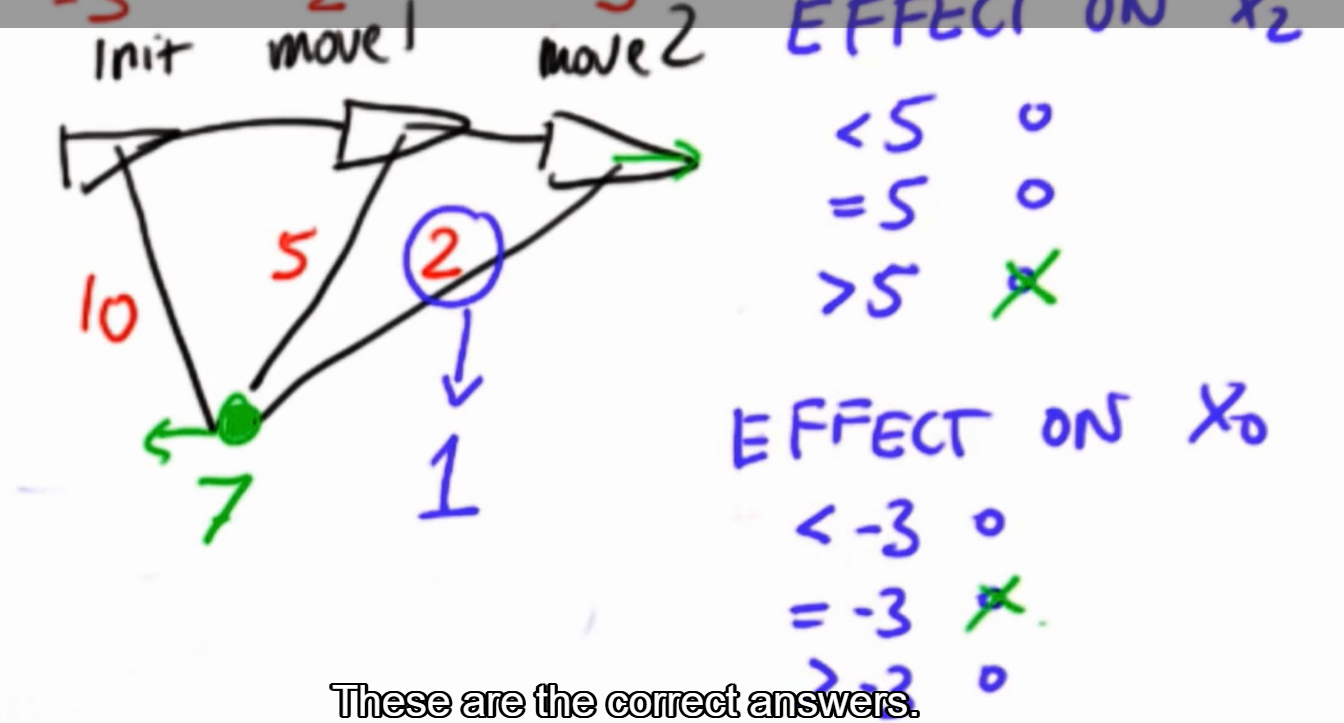

In [18]:
doit(-3, 5, 3, 10, 5, 1)

(array([[ 3., -1.,  0., -1.],
        [-1.,  3., -1., -1.],
        [ 0., -1.,  2., -1.],
        [-1., -1., -1.,  3.]]),
 array([[-18.],
        [ -3.],
        [  2.],
        [ 16.]]),
 array([[-3.   ],
        [ 2.125],
        [ 5.5  ],
        [ 6.875]]))

In [22]:
def doit(initial_pos, move1, move2, z0, z1, z2):
    omega = np.zeros((3,3))
    xi = np.zeros((3,1))
    omega[0,0] = 1
    xi[0,0] = initial_pos
    
    
    omega+= get_omega(3, 0, 1)
    xi+= get_xi(3, 0, 1, move1)
     
    omega+= get_omega(3, 1, 2)
    xi+= get_xi(3, 1, 2, move2)
    
    
    omega = np.pad(omega, ((0, 1), (0,1)), mode='constant', constant_values=0)
    xi = np.pad(xi, ((0, 1), (0,0)), mode='constant', constant_values=0)
    omega+= get_omega(4, 0, 3)
    xi+= get_xi(4, 0, 3, z0)
    
    omega+= get_omega(4, 1, 3)
    xi+= get_xi(4, 1, 3, z1)
    
    omega+= get_omega(4, 2, 3, sigma2 = 0.2)
    xi+= get_xi(4, 2, 3, z2, sigma2=0.2)# believe the constrain is true, how confident you are
    mu = np.linalg.inv(omega).dot(xi)
    return omega, xi, mu
doit(-3, 5, 3, 10, 5, 1)

(array([[ 3., -1.,  0., -1.],
        [-1.,  3., -1., -1.],
        [ 0., -1.,  6., -5.],
        [-1., -1., -5.,  7.]]),
 array([[-18.],
        [ -3.],
        [ -2.],
        [ 20.]]),
 array([[-3.        ],
        [ 2.17857143],
        [ 5.71428571],
        [ 6.82142857]]))

### Linear Graph SLAM
1. Initial position
1. motion
1. measurement
1. adding
1. calculate $\mu$